In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
import json
from datetime import datetime,  timedelta
from scipy.stats.stats import pearsonr
from sklearn.metrics import r2_score
import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Weather data from meteostat API

In [ ]:
# nyc
# 40.730610
# -73.935242

# copenhagen 
# 55.676098
# 12.568337

# london
# 51.509865
# -0.118092

lat = 51.509865
lon = -0.118092  

# Create Point that you want to look for
location = Point(lat, lon)
# start
date_time_str = '10/01/01 01:55:19'
date_time_obj = datetime.strptime(date_time_str, '%y/%m/%d %H:%M:%S')

#end
date_time_string = '15/12/31 01:55:19'
date_time_object = datetime.strptime(date_time_string, '%y/%m/%d %H:%M:%S')

start = date_time_obj.replace(hour=0,minute=0,second=0)
end = date_time_object.replace(hour=0,minute=0,second=0)

dataweather = Hourly(location,start,end)
dataweather = dataweather.fetch()

In [2]:
df = pd.read_csv('nyc_cop_lon2.csv')
df['time'] = pd.to_datetime(df['time'])

cities = df['city'].unique()
df_cph = df[df['city'] == 'Copenhagen']
df_newyork = df[df['city'] == 'New-York']
df_london = df[df['city'] == 'London']

print(df_cph.head(5))
print(df_newyork.head(5))
print(df_london.head(5))

   Unnamed: 0  index       time  temp  dwpt  rhum        city   wdir  wspd  \
0           0      0 2010-01-01  -5.8  -7.0  91.0  Copenhagen  360.0  22.3   
1           1      1 2010-01-01  -5.8  -7.0  91.0  Copenhagen  360.0  22.3   
2           2      2 2010-01-01  -5.8  -7.0  91.0  Copenhagen  360.0  22.3   
3           3      3 2010-01-01  -5.8  -7.0  91.0  Copenhagen  360.0  22.3   
4           4      4 2010-01-01  -5.8  -7.0  91.0  Copenhagen  360.0  22.3   

     pres  longitude   latitude  hour     type  count  ID  Segment ID  
0  1002.6  12.564408  55.686473   0.0  bicycle   13.0 NaN         NaN  
1  1002.6  12.565354  55.641459   0.0  vehicle   27.0 NaN         NaN  
2  1002.6  12.482855  55.710998   0.0  vehicle   82.0 NaN         NaN  
3  1002.6  12.482855  55.710998   0.0  vehicle  163.0 NaN         NaN  
4  1002.6  12.595038  55.670248   0.0  vehicle  242.0 NaN         NaN  
         Unnamed: 0  index       time  temp  dwpt  rhum      city   wdir  \
2700240     2700240    

In [3]:
# drop columns with Nan
df.drop(['Unnamed: 0','index','ID','Segment ID'],axis=1,inplace=True)

In [4]:
df

,time,temp,dwpt,rhum,city,wdir,wspd,pres,longitude,latitude,hour,type,count
0,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.564408,55.686473,0.0,bicycle,13.0
1,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.565354,55.641459,0.0,vehicle,27.0
2,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,82.0
3,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,163.0
4,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.595038,55.670248,0.0,vehicle,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021861,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.985890,40.699810,23.0,bicycle,6.0
3021862,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,0.000000,0.000000,23.0,bicycle,NaN
3021863,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.968386,40.711282,23.0,bicycle,2.0
3021864,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.994750,40.715600,23.0,bicycle,6.0


In [5]:
df['date'] = [d.date() for d in df['time']]

In [6]:
df['justtime'] = [d.time() for d in df['time']]

In [7]:
df

,time,temp,dwpt,rhum,city,wdir,wspd,pres,longitude,latitude,hour,type,count,date,justtime
0,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.564408,55.686473,0.0,bicycle,13.0,2010-01-01,00:00:00
1,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.565354,55.641459,0.0,vehicle,27.0,2010-01-01,00:00:00
2,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,82.0,2010-01-01,00:00:00
3,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,163.0,2010-01-01,00:00:00
4,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.595038,55.670248,0.0,vehicle,242.0,2010-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021861,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.985890,40.699810,23.0,bicycle,6.0,2014-12-31,23:00:00
3021862,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,0.000000,0.000000,23.0,bicycle,NaN,2014-12-31,23:00:00
3021863,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.968386,40.711282,23.0,bicycle,2.0,2014-12-31,23:00:00
3021864,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.994750,40.715600,23.0,bicycle,6.0,2014-12-31,23:00:00


In [8]:
df['day']= [d.weekday() for d in df['date']]

In [9]:
dic = {0:'Monday',1:'Tuesday',2:'Wednseday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [10]:
df['sday'] = df['day'].map(dic)

In [11]:
df

,time,temp,dwpt,rhum,city,wdir,wspd,pres,longitude,latitude,hour,type,count,date,justtime,day,sday
0,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.564408,55.686473,0.0,bicycle,13.0,2010-01-01,00:00:00,4,Friday
1,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.565354,55.641459,0.0,vehicle,27.0,2010-01-01,00:00:00,4,Friday
2,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,82.0,2010-01-01,00:00:00,4,Friday
3,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,163.0,2010-01-01,00:00:00,4,Friday
4,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.595038,55.670248,0.0,vehicle,242.0,2010-01-01,00:00:00,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021861,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.985890,40.699810,23.0,bicycle,6.0,2014-12-31,23:00:00,2,Wednseday
3021862,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,0.000000,0.000000,23.0,bicycle,NaN,2014-12-31,23:00:00,2,Wednseday
3021863,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.968386,40.711282,23.0,bicycle,2.0,2014-12-31,23:00:00,2,Wednseday
3021864,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.994750,40.715600,23.0,bicycle,6.0,2014-12-31,23:00:00,2,Wednseday


Predicting count based on weather conditions for the 3 cities and vehicles and bikes separately and check differencies.
Also check importance of variables

# DATASETS

#### Copenhagen full

In [12]:
df_cop = df[df['city']=='Copenhagen']

#### NYC full

In [13]:
df_ny = df[df['city']=='New-York']

__Copenhagen bicycles and vehicles__

In [14]:
cop_bic = df_cop[df_cop['type']=='bicycle']

In [15]:
cop_veh = df_cop[df_cop['type']=='vehicle']

__NYC bicycles and vehicles__

In [16]:
ny_bic =  df_ny[df_ny['type']=='bicycle']

In [17]:
ny_veh = df_ny[df_ny['type']=='vehicle']

# EDA

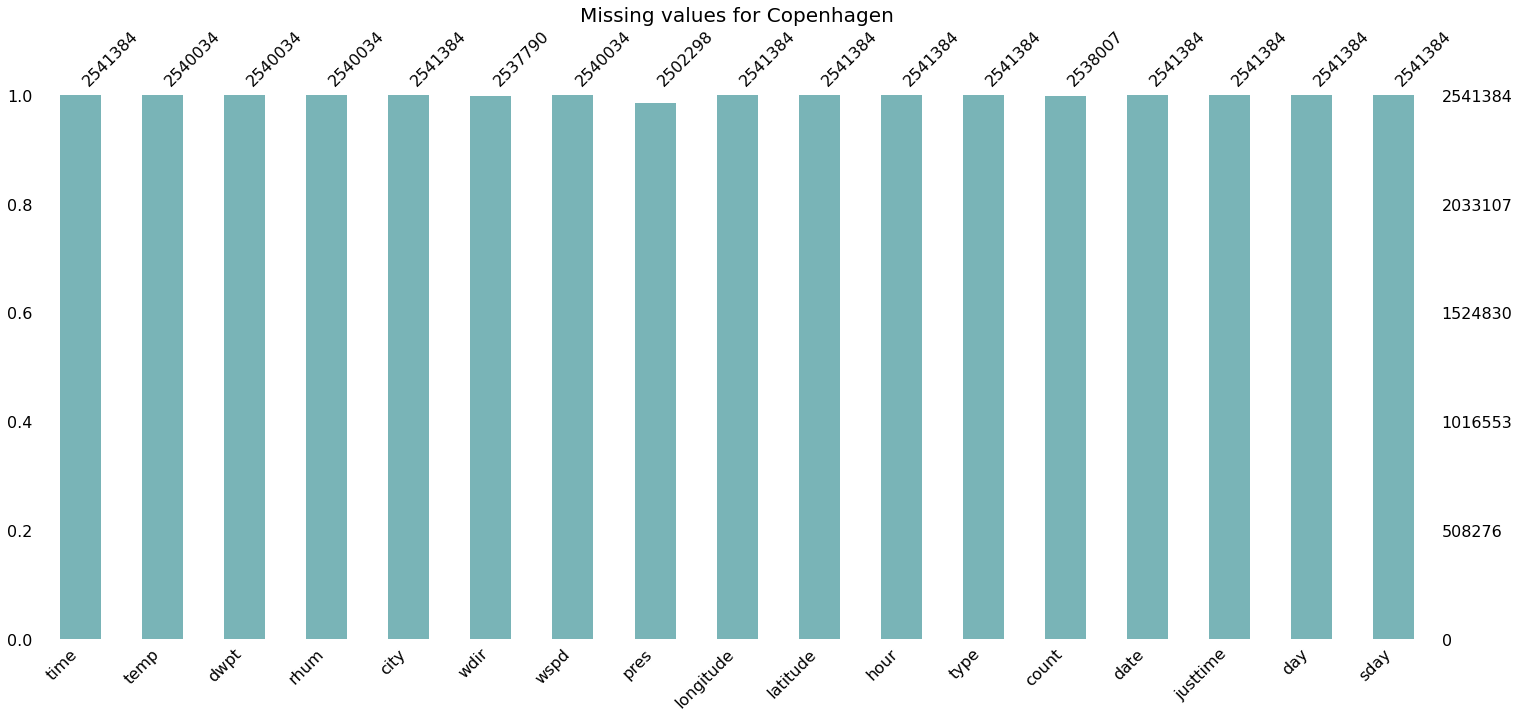

In [22]:
msno.bar(df_cop,color='#79B4B7')
plt.title('Missing values for Copenhagen',fontsize=20);
plt.savefig('Missing values-Copenhagen.png',dpi=300)

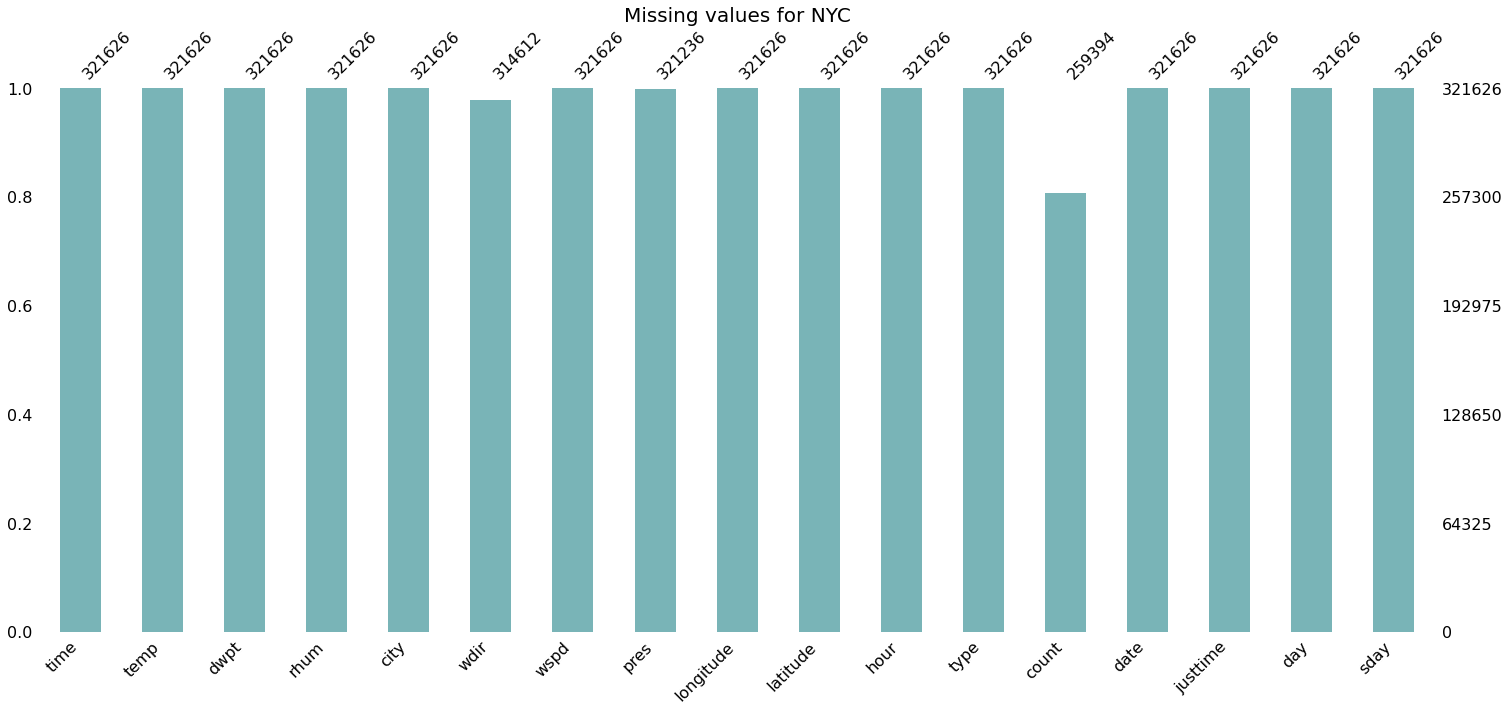

In [23]:
msno.bar(df_ny,color='#79B4B7')
plt.title('Missing values for NYC',fontsize=20);
plt.savefig('Missing values-NYC.png',dpi=300)

### Histogram of 'count' variable for Copenhagen and NYC

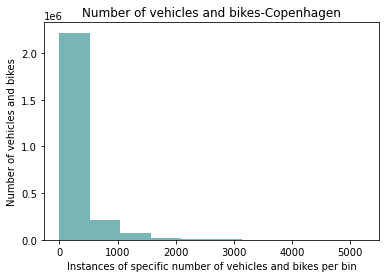

In [24]:
plt.hist(df_cop['count'],color='#79B4B7');
plt.title('Number of vehicles and bikes-Copenhagen');

plt.xlabel('Instances of specific number of vehicles and bikes per bin')
plt.ylabel('Number of vehicles and bikes')
plt.savefig('Count Histogram-Copenhagen.png',dpi=300)

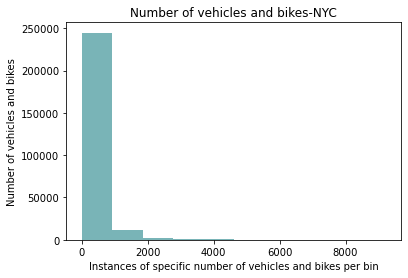

In [25]:
plt.hist(df_ny['count'],color='#79B4B7');
plt.title('Number of vehicles and bikes-NYC');

plt.xlabel('Instances of specific number of vehicles and bikes per bin')
plt.ylabel('Number of vehicles and bikes')
plt.savefig('Count Histogram-NYC.png',dpi=300)

# Predictions

### Copenhagen

In [28]:
X = df_cop[['temp','dwpt','rhum','wdir','wspd','pres','hour','day']]
y = df_cop[['count']]

# reset index, fill NaN values, stardardize
X.reset_index(drop=True,inplace=True)
X = X.apply(lambda x:x.fillna(x.mean()))
print(np.where(X.isnull()))
X = (X - X.mean())/X.std()

y.reset_index(drop=True,inplace=True)
y = y.apply(lambda el:el.fillna(el.mean()))
print(np.where(y.isnull()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

# evaluation metrics
print(np.corrcoef(y_pred,y_test,rowvar=False))
print(r2_score(y_test, y_pred))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
[[1.         0.19216128]
 [0.19216128 1.        ]]
0.036923300523331815


#### Actual vs Predicted graph

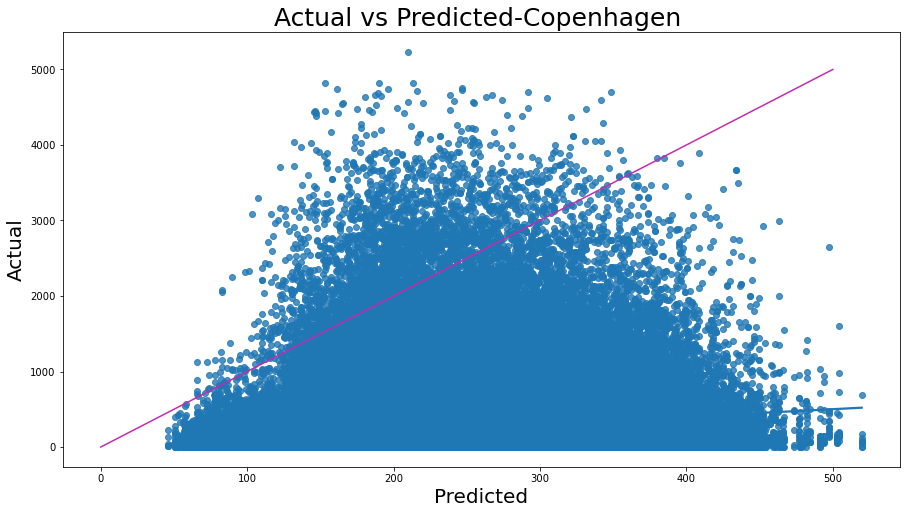

In [103]:
sns.regplot(x=y_pred, y=y_test)
plt.plot([0,500],[0,5000],color='#C32BAD')
plt.xlabel('Predicted',fontsize=20),
plt.ylabel('Actual',fontsize=20)
plt.title('Actual vs Predicted-Copenhagen ',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(15,8);


plt.savefig('Actual vs Predicted - Copenhagen.png',dpi=300)

#### Histograms of predicted and true values

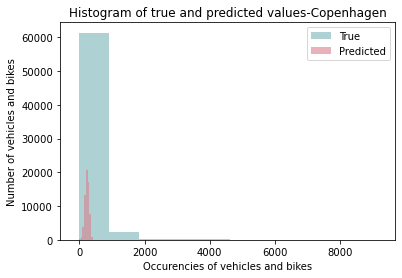

In [35]:
plt.hist(y_test, alpha=0.6, label='True',color='#79B4B7')
plt.hist(y_pred, alpha=0.6, label='Predicted',color='#DA7F8F')
plt.legend(loc='upper right')
plt.title('Histogram of true and predicted values-Copenhagen')
plt.xlabel('Occurencies of vehicles and bikes')
plt.ylabel('Number of vehicles and bikes')

plt.savefig('True and Predicted - Copenhagen.png',dpi=300)

### NYC

In [33]:
X = df_ny[['temp','dwpt','rhum','wdir','wspd','pres','hour','day']] # use hour and day
y = df_ny[['count']]

# reset index, fill NaN values, stardardize
X.reset_index(drop=True,inplace=True)
X = X.apply(lambda x:x.fillna(x.mean()))
print(np.where(X.isnull()))
X = (X - X.mean())/X.std()

y.reset_index(drop=True,inplace=True)
y = y.apply(lambda el:el.fillna(el.mean()))
print(np.where(y.isnull()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

# evaluation metrics
print(np.corrcoef(y_pred,y_test,rowvar=False))
print(r2_score(y_test, y_pred))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
[[1.         0.16080499]
 [0.16080499 1.        ]]
0.025792551276762388


#### Actual vs Predicted graph

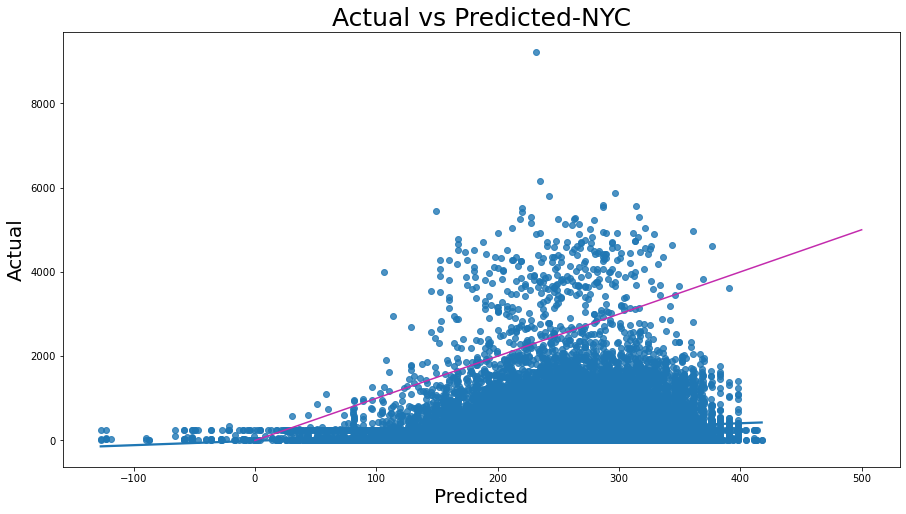

In [106]:
sns.regplot(x=y_pred, y=y_test)
plt.plot([0,500],[0,5000],color='#C32BAD')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.title('Actual vs Predicted-NYC',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(15,8);
plt.savefig('Actual vs Predicted - NYC.png',dpi=300)

#### Histogram of actual and predicted data points

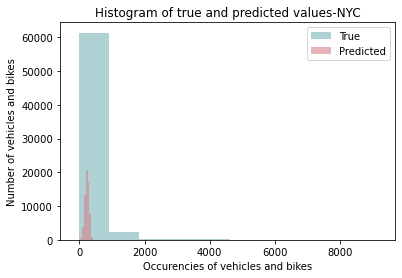

In [37]:
plt.hist(y_test, alpha=0.6, label='True',color='#79B4B7')
plt.hist(y_pred, alpha=0.6, label='Predicted',color='#DA7F8F')
plt.legend(loc='upper right')
plt.title('Histogram of true and predicted values-NYC')
plt.xlabel('Occurencies of vehicles and bikes')
plt.ylabel('Number of vehicles and bikes')
plt.savefig('True and Predicted - NYC.png',dpi=300)

## Correlation maps for Copemhagen and NYC

In [84]:
datas = df_ny

In [131]:
# fix size
from pylab import rcParams
rcParams['figure.figsize'] = 9,5

#### Correlation matrix for NYC

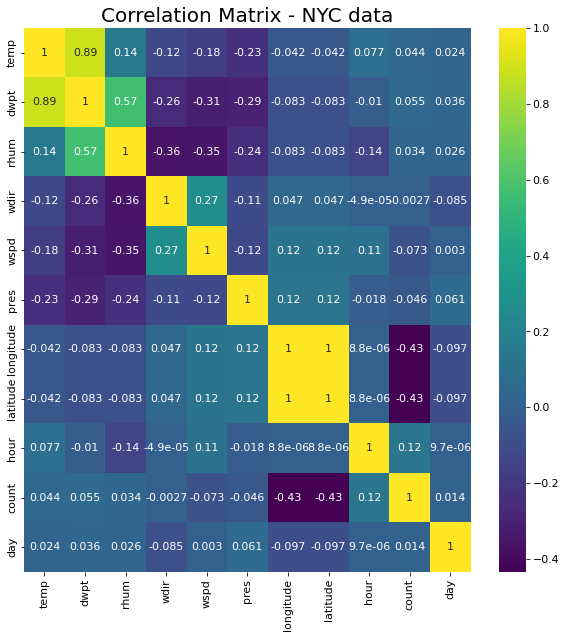

In [86]:
sns.heatmap(datas.corr(),annot=True,cmap='viridis');
plt.title('Correlation Matrix - NYC data',fontsize=20);


plt.savefig('NYC correlation matrix.png',dpi=300)

#### Correlation matrix for Copenhagen

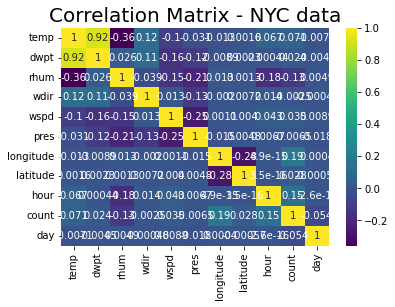

In [53]:
datas= df_cop
sns.heatmap(datas.corr(),annot=True,cmap='viridis');
plt.title('Correlation Matrix - NYC data',fontsize=20);
#plt.savefig('NYC correlation matrix.png',dpi=300)

# Hour and days clustemaps

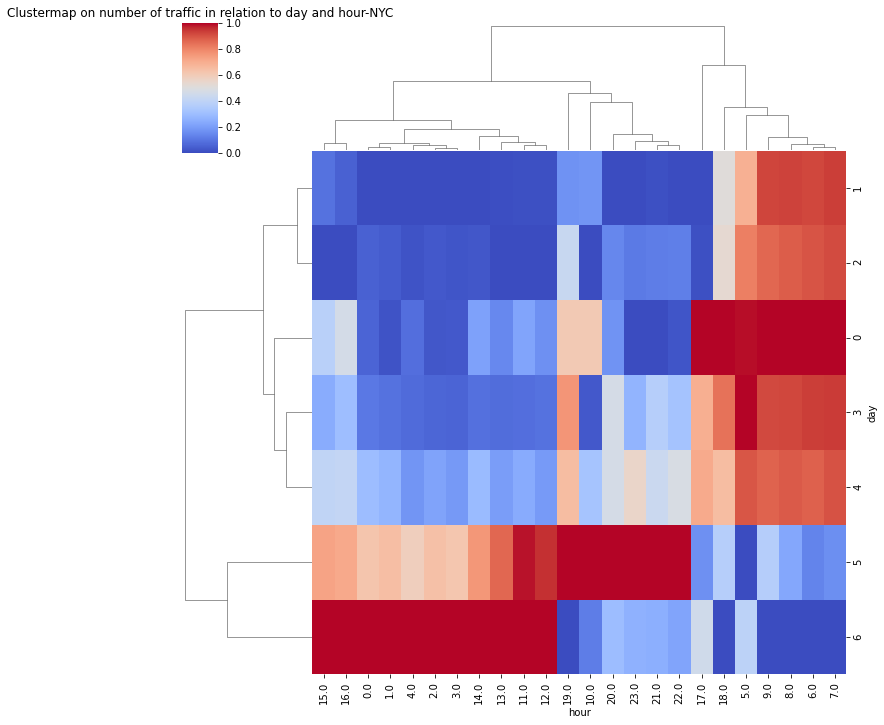

In [49]:
# NYC
dataframe = df_ny[['count','day','hour']]
pivot = dataframe.pivot_table(values='count',index='day',columns='hour')
pivot.fillna(pivot.mean(),inplace=True)
pivot.fillna(pivot.mean(),inplace=True)
sns.clustermap(pivot,cmap='coolwarm',standard_scale=1)
plt.title('Clustermap on number of traffic in relation to day and hour-NYC')
plt.savefig('NYC clusterhoursdays.png',dpi=300)

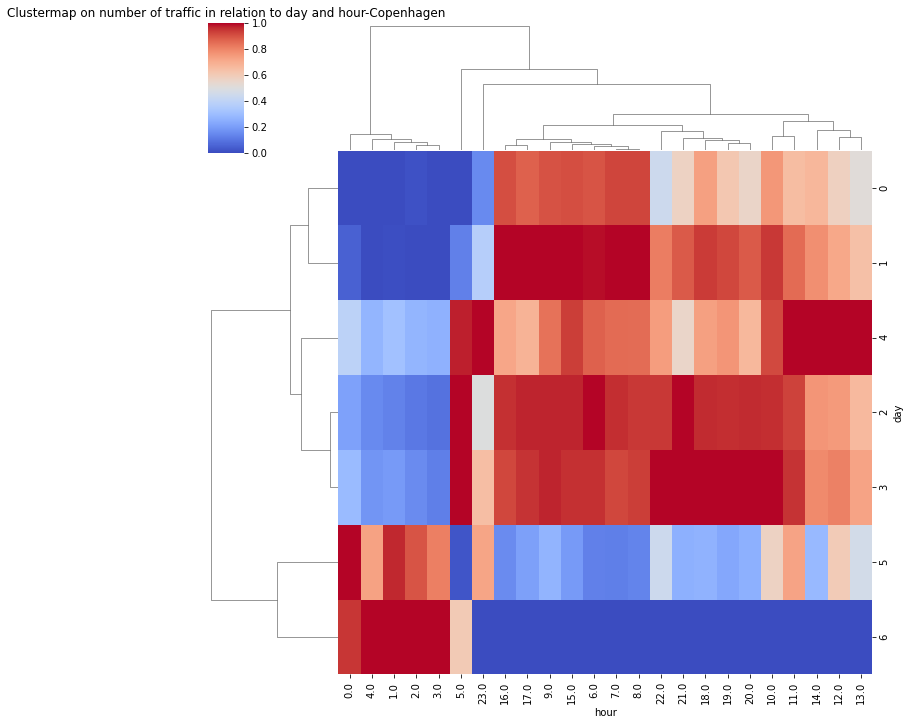

In [50]:
# Copenhagen
dataframe = df_cop[['count','day','hour']]
pivot = dataframe.pivot_table(values='count',index='day',columns='hour')
pivot.fillna(pivot.mean(),inplace=True)
pivot.fillna(pivot.mean(),inplace=True)

sns.clustermap(pivot,cmap='coolwarm',standard_scale=1);

plt.title('Clustermap on number of traffic in relation to day and hour-Copenhagen')
plt.savefig('Copenhagen clusterhoursdays.png',dpi=300)

# Days and Type Clustermaps

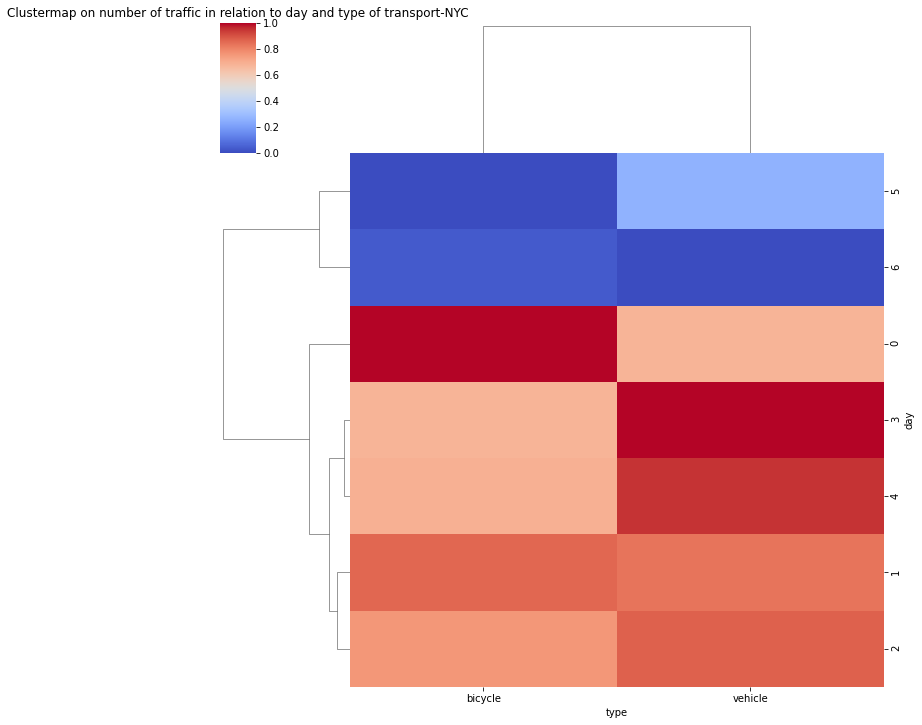

In [51]:
#NYC
dataframe = df_ny[['count','day','type']]
pivot = dataframe.pivot_table(values='count',index='day',columns='type')
pivot.fillna(pivot.mean(),inplace=True)
sns.clustermap(pivot,cmap='coolwarm',standard_scale=1);

plt.title('Clustermap on number of traffic in relation to day and type of transport-NYC')
plt.savefig('NYC clustertype.png',dpi=300)

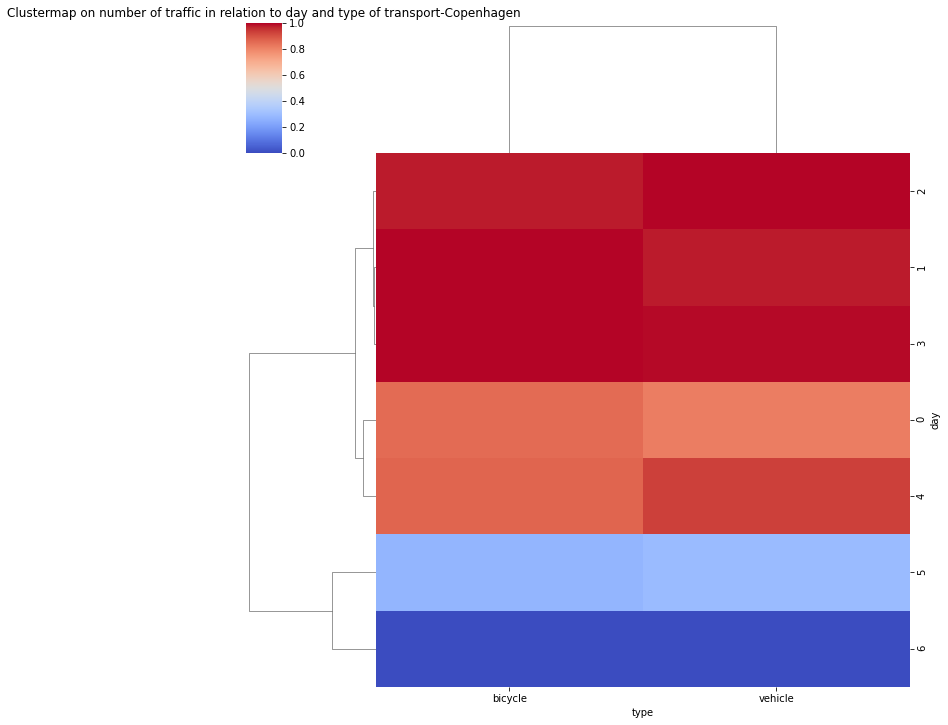

In [52]:
#NYC
dataframe = df_cop[['count','day','type']]
pivot = dataframe.pivot_table(values='count',index='day',columns='type')
pivot.fillna(pivot.mean(),inplace=True)
sns.clustermap(pivot,cmap='coolwarm',standard_scale=1);

plt.title('Clustermap on number of traffic in relation to day and type of transport-Copenhagen')
plt.savefig('Copenhagen clustertype.png',dpi=300)